In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv('/Users/Laura/Desktop/Chuy/Diplomado/Data Mining/Datos/fuerocomunmunicipios (1).csv',encoding='latin', low_memory=False)

In [3]:
df.head()

,state_code,mun_code,year,month,crime,category,type,subtype,count,population
0,1,1,2011,1,DELITOS PATRIMONIALES,DELITOS PATRIMONIALES,ABUSO DE CONFIANZA,ABUSO DE CONFIANZA,44.0,811483
1,1,1,2011,2,DELITOS PATRIMONIALES,DELITOS PATRIMONIALES,ABUSO DE CONFIANZA,ABUSO DE CONFIANZA,43.0,812551
2,1,1,2011,3,DELITOS PATRIMONIALES,DELITOS PATRIMONIALES,ABUSO DE CONFIANZA,ABUSO DE CONFIANZA,34.0,813619
3,1,1,2011,4,DELITOS PATRIMONIALES,DELITOS PATRIMONIALES,ABUSO DE CONFIANZA,ABUSO DE CONFIANZA,21.0,814686
4,1,1,2011,5,DELITOS PATRIMONIALES,DELITOS PATRIMONIALES,ABUSO DE CONFIANZA,ABUSO DE CONFIANZA,35.0,815754


In [4]:
df.shape

(5740636, 10)

In [5]:
df.describe()

,state_code,mun_code,year,month,count,population
count,5.740636e+06,5.740636e+06,5.740636e+06,5.740636e+06,2.326253e+06,5.740636e+06
mean,1.899102e+01,9.452533e+01,2.012263e+03,6.004696e+00,2.308071e+00,5.235490e+04
std,7.608523e+00,1.188232e+02,9.405606e-01,3.479479e+00,1.984210e+01,1.450224e+05
min,1.000000e+00,1.000000e+00,2.011000e+03,1.000000e+00,0.000000e+00,9.000000e+01
25%,1.400000e+01,2.100000e+01,2.012000e+03,3.000000e+00,0.000000e+00,5.329000e+03
50%,2.000000e+01,5.100000e+01,2.012000e+03,6.000000e+00,0.000000e+00,1.491100e+04
75%,2.400000e+01,1.090000e+02,2.013000e+03,9.000000e+00,0.000000e+00,3.693200e+04
max,3.200000e+01,5.700000e+02,2.014000e+03,1.200000e+01,3.778000e+03,1.830454e+06


In [6]:
df.state_code.value_counts(normalize=True)

20    0.170972
21    0.099794
30    0.089722
15    0.057485
7     0.054266
16    0.051966
31    0.047563
14    0.046854
13    0.038630
12    0.037250
8     0.030812
26    0.029409
29    0.026903
19    0.023431
11    0.021154
32    0.019959
24    0.019878
28    0.018786
10    0.017935
5     0.017475
17    0.015176
18    0.009198
22    0.008278
25    0.008278
27    0.007577
9     0.007335
4     0.005059
1     0.005059
23    0.004599
6     0.004599
3     0.002299
2     0.002299
Name: state_code, dtype: float64

In [7]:
df.type.value_counts(normalize=True)

CON VIOLENCIA                   0.272736
SIN VIOLENCIA                   0.272736
CULPOSAS                        0.060608
DOLOSAS                         0.060608
DOLOSOS                         0.060608
CULPOSOS                        0.060602
DESPOJO                         0.045451
ABIGEATO                        0.015152
ABUSO DE CONFIANZA              0.015150
DAÃO EN PROPIEDAD AJENA        0.015150
FRAUDE                          0.015150
VIOLACION                       0.015150
EXTORSION                       0.015150
OTROS SEXUALES                  0.015150
AMENAZAS                        0.015150
RESTO DE LOS DELITOS (OTROS)    0.015150
SECUESTRO                       0.015150
ESTUPRO                         0.015150
Name: type, dtype: float64

In [8]:
df.subtype.value_counts(normalize=True)

SIN DATOS                           0.166668
OTROS                               0.151518
CON ARMA DE FUEGO                   0.060608
CON ARMA BLANCA                     0.060606
DE VEHICULOS                        0.030304
A CAMIONES DE CARGA                 0.030304
A TRANSEUNTES                       0.030304
A EMPRESA DE TRASLADO DE VALORES    0.030304
A BANCOS                            0.030304
A CASA HABITACION                   0.030304
A CASA DE BOLSA                     0.030304
A VEHICULOS PARTICULARES            0.030304
A CASA DE CAMBIO                    0.030304
A NEGOCIO                           0.030304
A TRANSPORTISTAS                    0.030304
A AUTOBUSES                         0.030304
ABIGEATO                            0.015152
SIN VIOLENCIA                       0.015150
CON VIOLENCIA                       0.015150
VIOLACION                           0.015150
FRAUDE                              0.015150
EXTORSION                           0.015150
ABUSO DE C

In [9]:
df[['year','month','category','type','population']].groupby(['year','category']).mean()

month    population
year category                                                
2011 DELITOS PATRIMONIALES             6.500000  61366.210822
     DELITOS SEXUALES (VIOLACION)      6.500000  61366.210822
     HOMICIDIOS                        6.500000  61369.877526
     LESIONES                          6.500000  61372.076331
     OTROS DELITOS                     6.500000  61366.210822
     PRIV. DE LA LIBERTAD (SECUESTRO)  6.500000  61366.210822
     ROBO COMUN                        6.500000  61372.076331
     ROBO DE GANADO (ABIGEATO)         6.500000  61372.076331
     ROBO EN CARRETERAS                6.500000  61372.076331
     ROBO EN INSTITUCIONES BANCARIAS   6.500000  61372.076331
2012 DELITOS PATRIMONIALES             6.468022  47685.452274
     DELITOS SEXUALES (VIOLACION)      6.468022  47685.452274
     HOMICIDIOS                        6.468022  47685.452274
     LESIONES                          6.468022  47685.452274
     OTROS DELITOS                     6.468022  47685.452274
     PRIV. DE LA LIBERTAD (SECUESTRO)  6.468022  47685.452274
     ROBO COMUN                        6.468022  47685.452274
     ROBO DE GANADO (ABIGEATO)         6.468022  47685.452274
     ROBO EN CARRETERAS                6.468022  47685.452274
     ROBO EN INSTITUCIONES BANCARIAS   6.468022  47685.452274
2013 DELITOS PATRIMONIALES             6.235440  50023.131779
     DELITOS SEXUALES (VIOLACION)      6.235440  50023.131779
     HOMICIDIOS                        6.235440  50023.131779
     LESIONES                          6.235440  50023.131779
     OTROS DELITOS                     6.235440  50023.131779
     PRIV. DE LA LIBERTAD (SECUESTRO)  6.235440  50023.131779
     ROBO COMUN                        6.235440  50023.131779
     ROBO DE GANADO (ABIGEATO)         6.235440  50023.131779
     ROBO EN CARRETERAS                6.235440  50023.131779
     ROBO EN INSTITUCIONES BANCARIAS   6.235440  50023.131779
2014 DELITOS PATRIMONIALES             2.329216  52938.481770
     DELITOS SEXUALES (VIOLACION)      2.329216  52938.481770
     HOMICIDIOS                        2.329415  52945.713292
     LESIONES                          2.329415  52945.713292
     OTROS DELITOS                     2.329415  52945.713292
     PRIV. DE LA LIBERTAD (SECUESTRO)  2.329415  52945.713292
     ROBO COMUN                        2.329415  52945.713292
     ROBO DE GANADO (ABIGEATO)         2.329415  52945.713292
     ROBO EN CARRETERAS                2.329415  52945.713292
     ROBO EN INSTITUCIONES BANCARIAS   2.329415  52945.713292

In [10]:
df.groupby(['state_code','crime']).count()

mun_code    year   month  \
state_code crime                                                        
1          DELITOS PATRIMONIALES                 3080    3080    3080   
           DELITOS SEXUALES                       440     440     440   
           HOMICIDIOS                            3520    3520    3520   
           LESIONES                              3520    3520    3520   
           OTROS DELITOS                         1760    1760    1760   
           PRIV. DE LA LIBERTAD (SECUESTRO)       440     440     440   
           ROBOS                                16280   16280   16280   
2          DELITOS PATRIMONIALES                 1400    1400    1400   
           DELITOS SEXUALES                       200     200     200   
           HOMICIDIOS                            1600    1600    1600   
           LESIONES                              1600    1600    1600   
           OTROS DELITOS                          800     800     800   
           PRIV. DE LA LIBERTAD (SECUESTRO)       200     200     200   
           ROBOS                                 7400    7400    7400   
3          DELITOS PATRIMONIALES                 1400    1400    1400   
           DELITOS SEXUALES                       200     200     200   
           HOMICIDIOS                            1600    1600    1600   
           LESIONES                              1600    1600    1600   
           OTROS DELITOS                          800     800     800   
           PRIV. DE LA LIBERTAD (SECUESTRO)       200     200     200   
           ROBOS                                 7400    7400    7400   
4          DELITOS PATRIMONIALES                 3080    3080    3080   
           DELITOS SEXUALES                       440     440     440   
           HOMICIDIOS                            3520    3520    3520   
           LESIONES                              3520    3520    3520   
           OTROS DELITOS                         1760    1760    1760   
           PRIV. DE LA LIBERTAD (SECUESTRO)       440     440     440   
           ROBOS                                16280   16280   16280   
5          DELITOS PATRIMONIALES                10640   10640   10640   
           DELITOS SEXUALES                      1520    1520    1520   
...                                               ...     ...     ...   
28         PRIV. DE LA LIBERTAD (SECUESTRO)      1634    1634    1634   
           ROBOS                                60458   60458   60458   
29         DELITOS PATRIMONIALES                16380   16380   16380   
           DELITOS SEXUALES                      2340    2340    2340   
           HOMICIDIOS                           18720   18720   18720   
           LESIONES                             18720   18720   18720   
           OTROS DELITOS                         9360    9360    9360   
           PRIV. DE LA LIBERTAD (SECUESTRO)      2340    2340    2340   
           ROBOS                                86580   86580   86580   
30         DELITOS PATRIMONIALES                54628   54628   54628   
           DELITOS SEXUALES                      7804    7804    7804   
           HOMICIDIOS                           62432   62432   62432   
           LESIONES                             62432   62432   62432   
           OTROS DELITOS                        31216   31216   31216   
           PRIV. DE LA LIBERTAD (SECUESTRO)      7804    7804    7804   
           ROBOS                               288748  288748  288748   
31         DELITOS PATRIMONIALES                28959   28959   28959   
           DELITOS SEXUALES                      4137    4137    4137   
           HOMICIDIOS                           33096   33096   33096   
           LESIONES                             33096   33096   33096   
           OTROS DELITOS                        16548   16548   16548   
           PRIV. DE LA LIBERTAD (SECUESTRO)      4137    4137    4137   
           ROBOS              

In [11]:
df_normalized = df.dropna().copy()
min_max_scaler = preprocessing.MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(df_normalized['population'].values.reshape(-1,1))
df_normalized['population_norm'] = np_scaled.reshape(-1,1)
df_normalized.head()

/opt/anaconda2/lib/python2.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


,state_code,mun_code,year,month,crime,category,type,subtype,count,population,population_norm
0,1,1,2011,1,DELITOS PATRIMONIALES,DELITOS PATRIMONIALES,ABUSO DE CONFIANZA,ABUSO DE CONFIANZA,44.0,811483,0.443200
1,1,1,2011,2,DELITOS PATRIMONIALES,DELITOS PATRIMONIALES,ABUSO DE CONFIANZA,ABUSO DE CONFIANZA,43.0,812551,0.443783
2,1,1,2011,3,DELITOS PATRIMONIALES,DELITOS PATRIMONIALES,ABUSO DE CONFIANZA,ABUSO DE CONFIANZA,34.0,813619,0.444367
3,1,1,2011,4,DELITOS PATRIMONIALES,DELITOS PATRIMONIALES,ABUSO DE CONFIANZA,ABUSO DE CONFIANZA,21.0,814686,0.444950
4,1,1,2011,5,DELITOS PATRIMONIALES,DELITOS PATRIMONIALES,ABUSO DE CONFIANZA,ABUSO DE CONFIANZA,35.0,815754,0.445533


In [12]:
df_state_1=df[df['state_code']==1]

In [13]:
df_state_1

,state_code,mun_code,year,month,crime,category,type,subtype,count,population
0,1,1,2011,1,DELITOS PATRIMONIALES,DELITOS PATRIMONIALES,ABUSO DE CONFIANZA,ABUSO DE CONFIANZA,44.0,811483
1,1,1,2011,2,DELITOS PATRIMONIALES,DELITOS PATRIMONIALES,ABUSO DE CONFIANZA,ABUSO DE CONFIANZA,43.0,812551
2,1,1,2011,3,DELITOS PATRIMONIALES,DELITOS PATRIMONIALES,ABUSO DE CONFIANZA,ABUSO DE CONFIANZA,34.0,813619
3,1,1,2011,4,DELITOS PATRIMONIALES,DELITOS PATRIMONIALES,ABUSO DE CONFIANZA,ABUSO DE CONFIANZA,21.0,814686
4,1,1,2011,5,DELITOS PATRIMONIALES,DELITOS PATRIMONIALES,ABUSO DE CONFIANZA,ABUSO DE CONFIANZA,35.0,815754
5,1,1,2011,6,DELITOS PATRIMONIALES,DELITOS PATRIMONIALES,ABUSO DE CONFIANZA,ABUSO DE CONFIANZA,43.0,816822
6,1,1,2011,7,DELITOS PATRIMONIALES,DELITOS PATRIMONIALES,ABUSO DE CONFIANZA,ABUSO DE CONFIANZA,42.0,817861
7,1,1,2011,8,DELITOS PATRIMONIALES,DELITOS PATRIMONIALES,ABUSO DE CONFIANZA,ABUSO DE CONFIANZA,37.0,818900
8,1,1,2011,9,DELITOS PATRIMONIALES,DELITOS PATRIMONIALES,ABUSO DE CONFIANZA,ABUSO DE CONFIANZA,36.0,819939
9,1,1,2011,10,DELITOS PATRIMONIALES,DELITOS PATRIMONIALES,ABUSO DE CONFIANZA,ABUSO DE CONFIANZA,37.0,820978


In [14]:
df_state_1.groupby(['crime'])[['population']].sum()

,population
crime,
DELITOS PATRIMONIALES,346506979
DELITOS SEXUALES,49500997
HOMICIDIOS,396007976
LESIONES,396007976
OTROS DELITOS,198003988
PRIV. DE LA LIBERTAD (SECUESTRO),49500997
ROBOS,1831536889


In [15]:
df_state_1.groupby(['month','type'])[['count']].sum()

count
month type                                
1     ABIGEATO                        48.0
      ABUSO DE CONFIANZA             195.0
      AMENAZAS                       252.0
      CON VIOLENCIA                  328.0
      CULPOSAS                       296.0
      CULPOSOS                        50.0
      DAÃO EN PROPIEDAD AJENA       650.0
      DESPOJO                         37.0
      DOLOSAS                        583.0
      DOLOSOS                         16.0
      ESTUPRO                         12.0
      EXTORSION                       28.0
      FRAUDE                         261.0
      OTROS SEXUALES                 100.0
      RESTO DE LOS DELITOS (OTROS)   866.0
      SECUESTRO                        0.0
      SIN VIOLENCIA                 3417.0
      VIOLACION                       41.0
2     ABIGEATO                        54.0
      ABUSO DE CONFIANZA             216.0
      AMENAZAS                       259.0
      CON VIOLENCIA                  308.0
      CULPOSAS                       371.0
      CULPOSOS                        61.0
      DAÃO EN PROPIEDAD AJENA       725.0
      DESPOJO                         47.0
      DOLOSAS                        613.0
      DOLOSOS                         20.0
      ESTUPRO                          9.0
      EXTORSION                       42.0
...                                    ...
11    DAÃO EN PROPIEDAD AJENA       446.0
      DESPOJO                         30.0
      DOLOSAS                        470.0
      DOLOSOS                         15.0
      ESTUPRO                          5.0
      EXTORSION                       12.0
      FRAUDE                         188.0
      OTROS SEXUALES                  75.0
      RESTO DE LOS DELITOS (OTROS)   687.0
      SECUESTRO                        0.0
      SIN VIOLENCIA                 2402.0
      VIOLACION                       32.0
12    ABIGEATO                        38.0
      ABUSO DE CONFIANZA              82.0
      AMENAZAS                       179.0
      CON VIOLENCIA                  263.0
      CULPOSAS                       258.0
      CULPOSOS                        53.0
      DAÃO EN PROPIEDAD AJENA       510.0
      DESPOJO                         23.0
      DOLOSAS                        466.0
      DOLOSOS                          6.0
      ESTUPRO                          7.0
      EXTORSION                       13.0
      FRAUDE                         151.0
      OTROS SEXUALES                  66.0
      RESTO DE LOS DELITOS (OTROS)   596.0
      SECUESTRO                        0.0
      SIN VIOLENCIA                 2251.0
      VIOLACION                       30.0

[216 rows x 1 columns]

In [16]:
df_state_1.groupby(['month'])[['count']].sum()

,count
month,
1,7180.0
2,7506.0
3,7870.0
4,7700.0
5,6206.0
6,6089.0
7,6146.0
8,6166.0
9,5947.0


In [17]:
delitos_por_mes=df_state_1.groupby(['month'])[['count']].sum()

KeyboardInterrupt: 

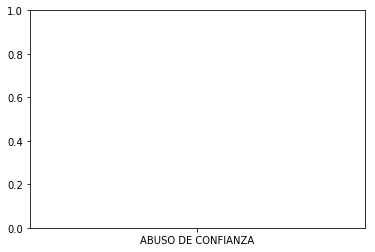

In [20]:
plt.hist(df_state_1['type'])
plt.xlabel('Delito')
plt.ylabel('Frecuencia')
plt.title('Frecuencia de Delitos')